In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf
import gspread as gs
import warnings
import sys
warnings.filterwarnings('ignore')

In [2]:
gc = gs.service_account(filename="C:/Users/leste/OneDrive/Desktop/Python files/mypythonprogrammes/Mydatafiles/service_account.json")

In [3]:
google_spreadsheet = gc.open_by_url("https://docs.google.com/spreadsheets/d/1cM1pMxHZof65AeVIUJphyYZze3Ew0myrzqlmg9tvQdg/edit#gid=1044390699")

In [4]:

class Returns_analysis():
    individual_stock_data = pd.DataFrame()
    Stock_Data = pd.DataFrame()
    stock_dict = {}
   
    def __init__(self,tickers : list,start_date):
            self.tickers = tickers
            self.start_date = start_date
           
    
    def individual_data(self):
         yf.pdr_override()
         for ticks in self.tickers:
                individual_stock_data = pdr.DataReader(ticks.title, self.start_date)
                Returns_Analysis.stock_dict.update({f"{ticks.title}_stock" : individual_stock_data})
                
    def download_stocks(self, column_name : str):
            self.column_name = column_name
            yf.pdr_override()
            for ticks in self.tickers:
               Returns_analysis.Stock_Data[ticks.title] = pdr.DataReader(ticks.title, self.start_date)[column_name]
            return Returns_analysis.Stock_Data


    def calculate_returns(self,return_type):
           self.return_type = return_type
           if return_type == "Log":
                returns_data = np.log(Returns_analysis.Stock_Data/Returns_analysis.Stock_Data.shift(1))
           else: 
                returns_data = (Returns_analysis.Stock_Data/Returns_analysis.Stock_Data.shift(1))-1
           return returns_data

    def normalization(self):
            normalized_data = (Returns_analysis.Stock_Data/Returns_analysis.Stock_Data.iloc[0]*100)
            normalized_figure = normalized_data.plot(figsize = (19,6))
            plt.title("Growth Comparison of Stocks")
            return normalized_figure
    
    def individual_return(self):
            individual_return = self.calculate_returns(self.return_type).mean()*250*100

            print(f"The {self.return_type} return of the stocks are {round(individual_return,2)}")
        

    def portfolio_return(self,weights = list):
            import sys
            weights = np.array(weights)
            if round(sum(weights),2)!= 1 :
                raise ValueError(f"Sum of the weight of the porfolio should be 1,The sum of your weights are {sum(weights)}")
                if len(weights) != Returns_Analysis.Stock_Data.shape[1]:
                    sys.exit("The weights of individual security does not match the no. of securities")
            annual_returns = np.dot(self.calculate_returns(self.return_type).mean()*250, weights)

            print(f"The annual returns of the portfolio is {round(annual_returns, 2)}% ")


    def individual_risk_factor(self):
                risk_factor = pd.DataFrame(np.sqrt(self.calculate_returns(self.return_type).var()*250))
                print(risk_factor)

                print(f"The lowest risk factor is{risk_factor.min()}")

<font face = "Times New Roman" size = 5> Creating DataFrames </font>

In [5]:

def extract_sheets():
    token_ids = []
    sheets = google_spreadsheet.worksheets()
    token_ids = [sheet for sheet in sheets]
    return token_ids
    
extract_sheets()
    

[<Worksheet 'AAPL' id:0>,
 <Worksheet 'MSFT' id:177394609>,
 <Worksheet 'GOOG' id:1261668908>,
 <Worksheet 'AMZN' id:1631741944>,
 <Worksheet 'TSLA' id:1799150376>,
 <Worksheet 'NVDA' id:669265052>,
 <Worksheet 'META' id:1044390699>,
 <Worksheet 'INTC' id:1466750836>,
 <Worksheet 'CSCO' id:443690156>,
 <Worksheet 'AMD' id:850053490>]

In [6]:
securities = Returns_analysis(tickers= extract_sheets(), start_date= "2015-1-1")

In [7]:
securities.download_stocks(column_name="Adj Close")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,AAPL,MSFT,GOOG,AMZN,TSLA,NVDA,META,INTC,CSCO,AMD
Date,,,,,,,,,,
2015-01-02,24.603207,40.811440,26.168653,15.426000,14.620667,4.834949,78.449997,28.929893,21.460136,2.670000
2015-01-05,23.910091,40.436131,25.623152,15.109500,14.006000,4.753286,77.190002,28.603680,21.032642,2.660000
2015-01-06,23.912346,39.842640,25.029282,14.764500,14.085333,4.609174,76.150002,28.070595,21.024879,2.630000
2015-01-07,24.247644,40.348846,24.986401,14.921000,14.063333,4.597165,76.150002,28.659374,21.219191,2.580000
2015-01-08,25.179302,41.535839,25.065184,15.023000,14.041333,4.770099,78.180000,29.192465,21.382410,2.610000
...,...,...,...,...,...,...,...,...,...,...
2023-01-13,134.759995,239.229996,92.800003,98.120003,122.400002,168.990005,136.979996,30.110001,48.880001,71.000000
2023-01-17,135.940002,240.350006,92.160004,96.050003,131.490005,177.020004,135.360001,29.600000,48.080002,71.589996
2023-01-18,135.210007,235.809998,91.779999,95.459999,128.779999,173.770004,133.020004,28.809999,46.900002,70.529999


In [13]:
securities.calculate_returns("Simple")

,AAPL,MSFT,GOOG,AMZN,TSLA,NVDA,META,INTC,CSCO,AMD
Date,,,,,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.028172,-0.009196,-0.020846,-0.020517,-0.042041,-0.016890,-0.016061,-0.011276,-0.019920,-0.003745
2015-01-06,0.000094,-0.014677,-0.023177,-0.022833,0.005664,-0.030318,-0.013473,-0.018637,-0.000369,-0.011278
2015-01-07,0.014022,0.012705,-0.001713,0.010600,-0.001562,-0.002605,0.000000,0.020975,0.009242,-0.019011
2015-01-08,0.038423,0.029418,0.003153,0.006836,-0.001564,0.037618,0.026658,0.018601,0.007692,0.011628
...,...,...,...,...,...,...,...,...,...,...
2023-01-13,0.010119,0.003019,0.009683,0.029915,-0.009388,0.023500,0.001975,-0.005943,-0.002449,0.002825
2023-01-17,0.008756,0.004682,-0.006897,-0.021097,0.074265,0.047518,-0.011827,-0.016938,-0.016367,0.008310
2023-01-18,-0.005370,-0.018889,-0.004123,-0.006143,-0.020610,-0.018360,-0.017287,-0.026689,-0.024542,-0.014807


<AxesSubplot: title={'center': 'Growth Comparison of Stocks'}, xlabel='Date'>

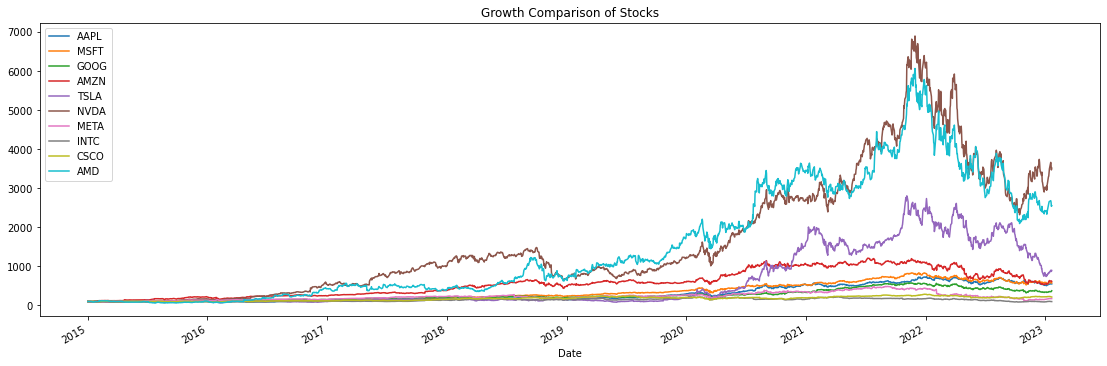

In [14]:
securities.normalization()

In [15]:
securities.individual_return()

The Simple return of the stocks are AAPL    25.50
MSFT    25.60
GOOG    20.28
AMZN    27.94
TSLA    43.08
NVDA    55.36
META    13.91
INTC     5.12
CSCO    12.88
AMD     58.01
dtype: float64


In [16]:
securities.portfolio_return(weights= [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1])

The annual returns of the portfolio is 0.29% 


In [17]:
securities.individual_risk_factor()

             0
AAPL  0.298075
MSFT  0.280619
GOOG  0.282389
AMZN  0.332154
TSLA  0.566503
NVDA  0.479157
META  0.370709
INTC  0.326326
CSCO  0.261511
AMD   0.607704
The lowest risk factor is0    0.261511
dtype: float64


<font face = "Times New Roman" size = 5>Parsing dates</font>

Applying Normalization

We use Normalization to visualize the data because we want to facilitate a comparison between the stock prices as if they were starting from a common point

if we don't use normalization we'll encounter variations at the beginning of the plot which won't help in analysis